In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: 0886110301_M251grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.658e-03 +/- 4.563e-04 (64.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-5
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 2.144e+04 sec
 Using fit statistic: chi
 Using Background File                0886110301_M251spec_bkg.fits
  Background Exposure Time: 2.144e+04 sec
 Using Response (RMF) File            0886110301_M251spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886110301_M251spec.arf



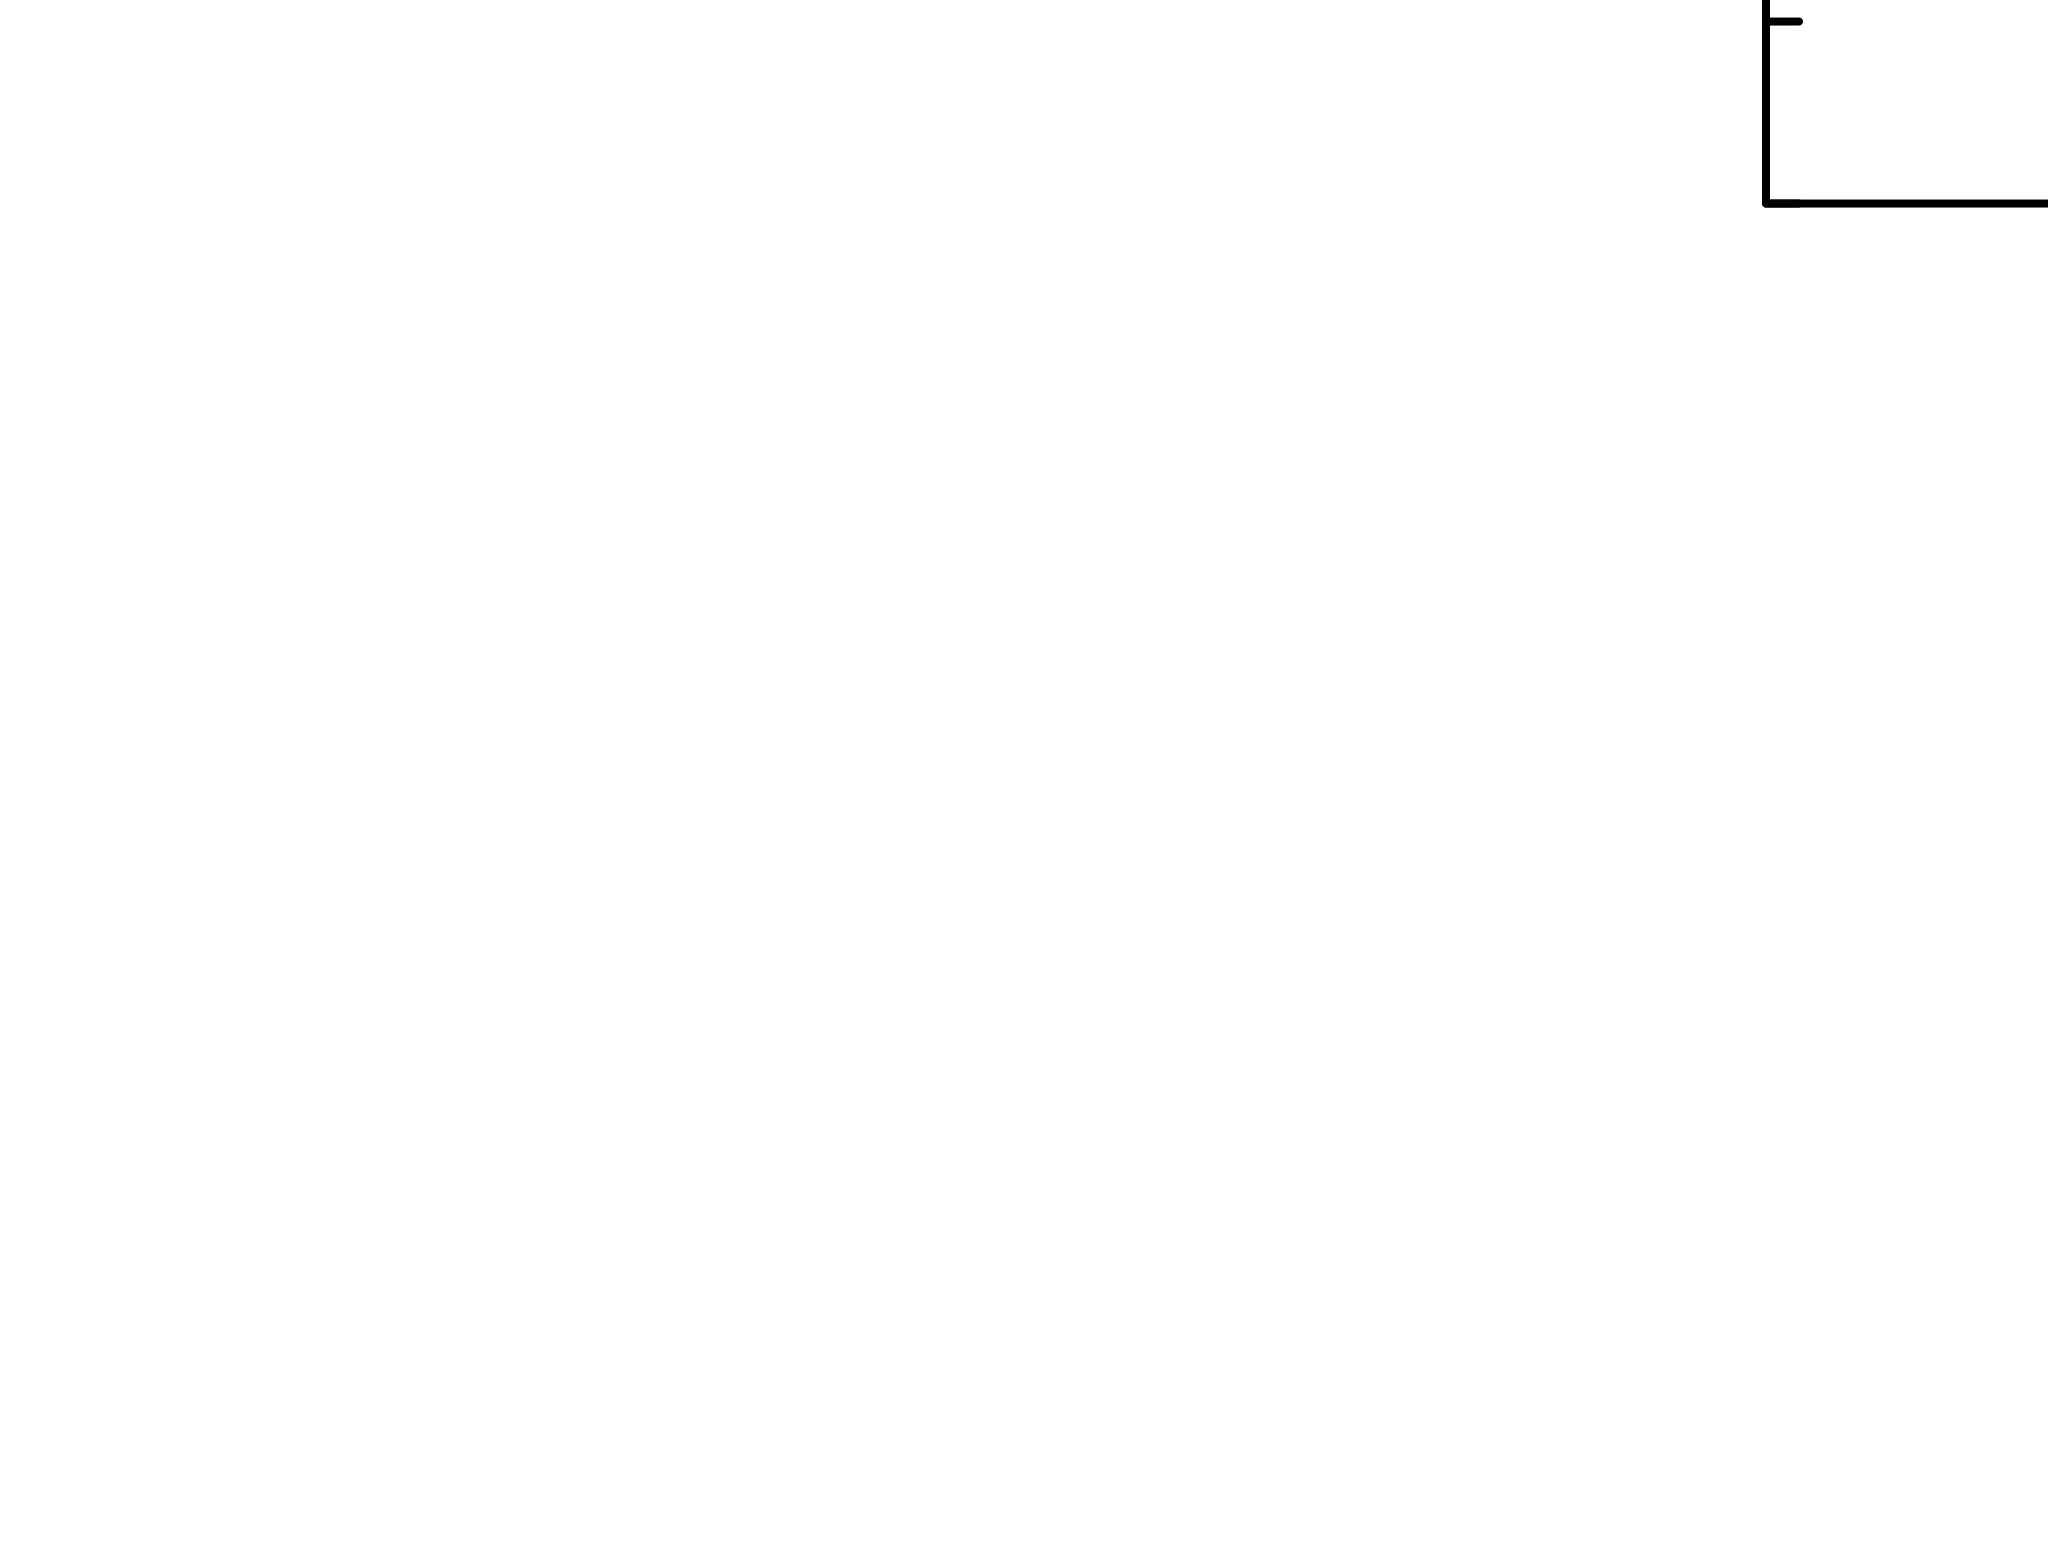

     1 channels (1) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



In [2]:
spec_fnames = glob.glob('*grpspec*')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00005 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              5.786408e+11     using 4 bins.

Tes

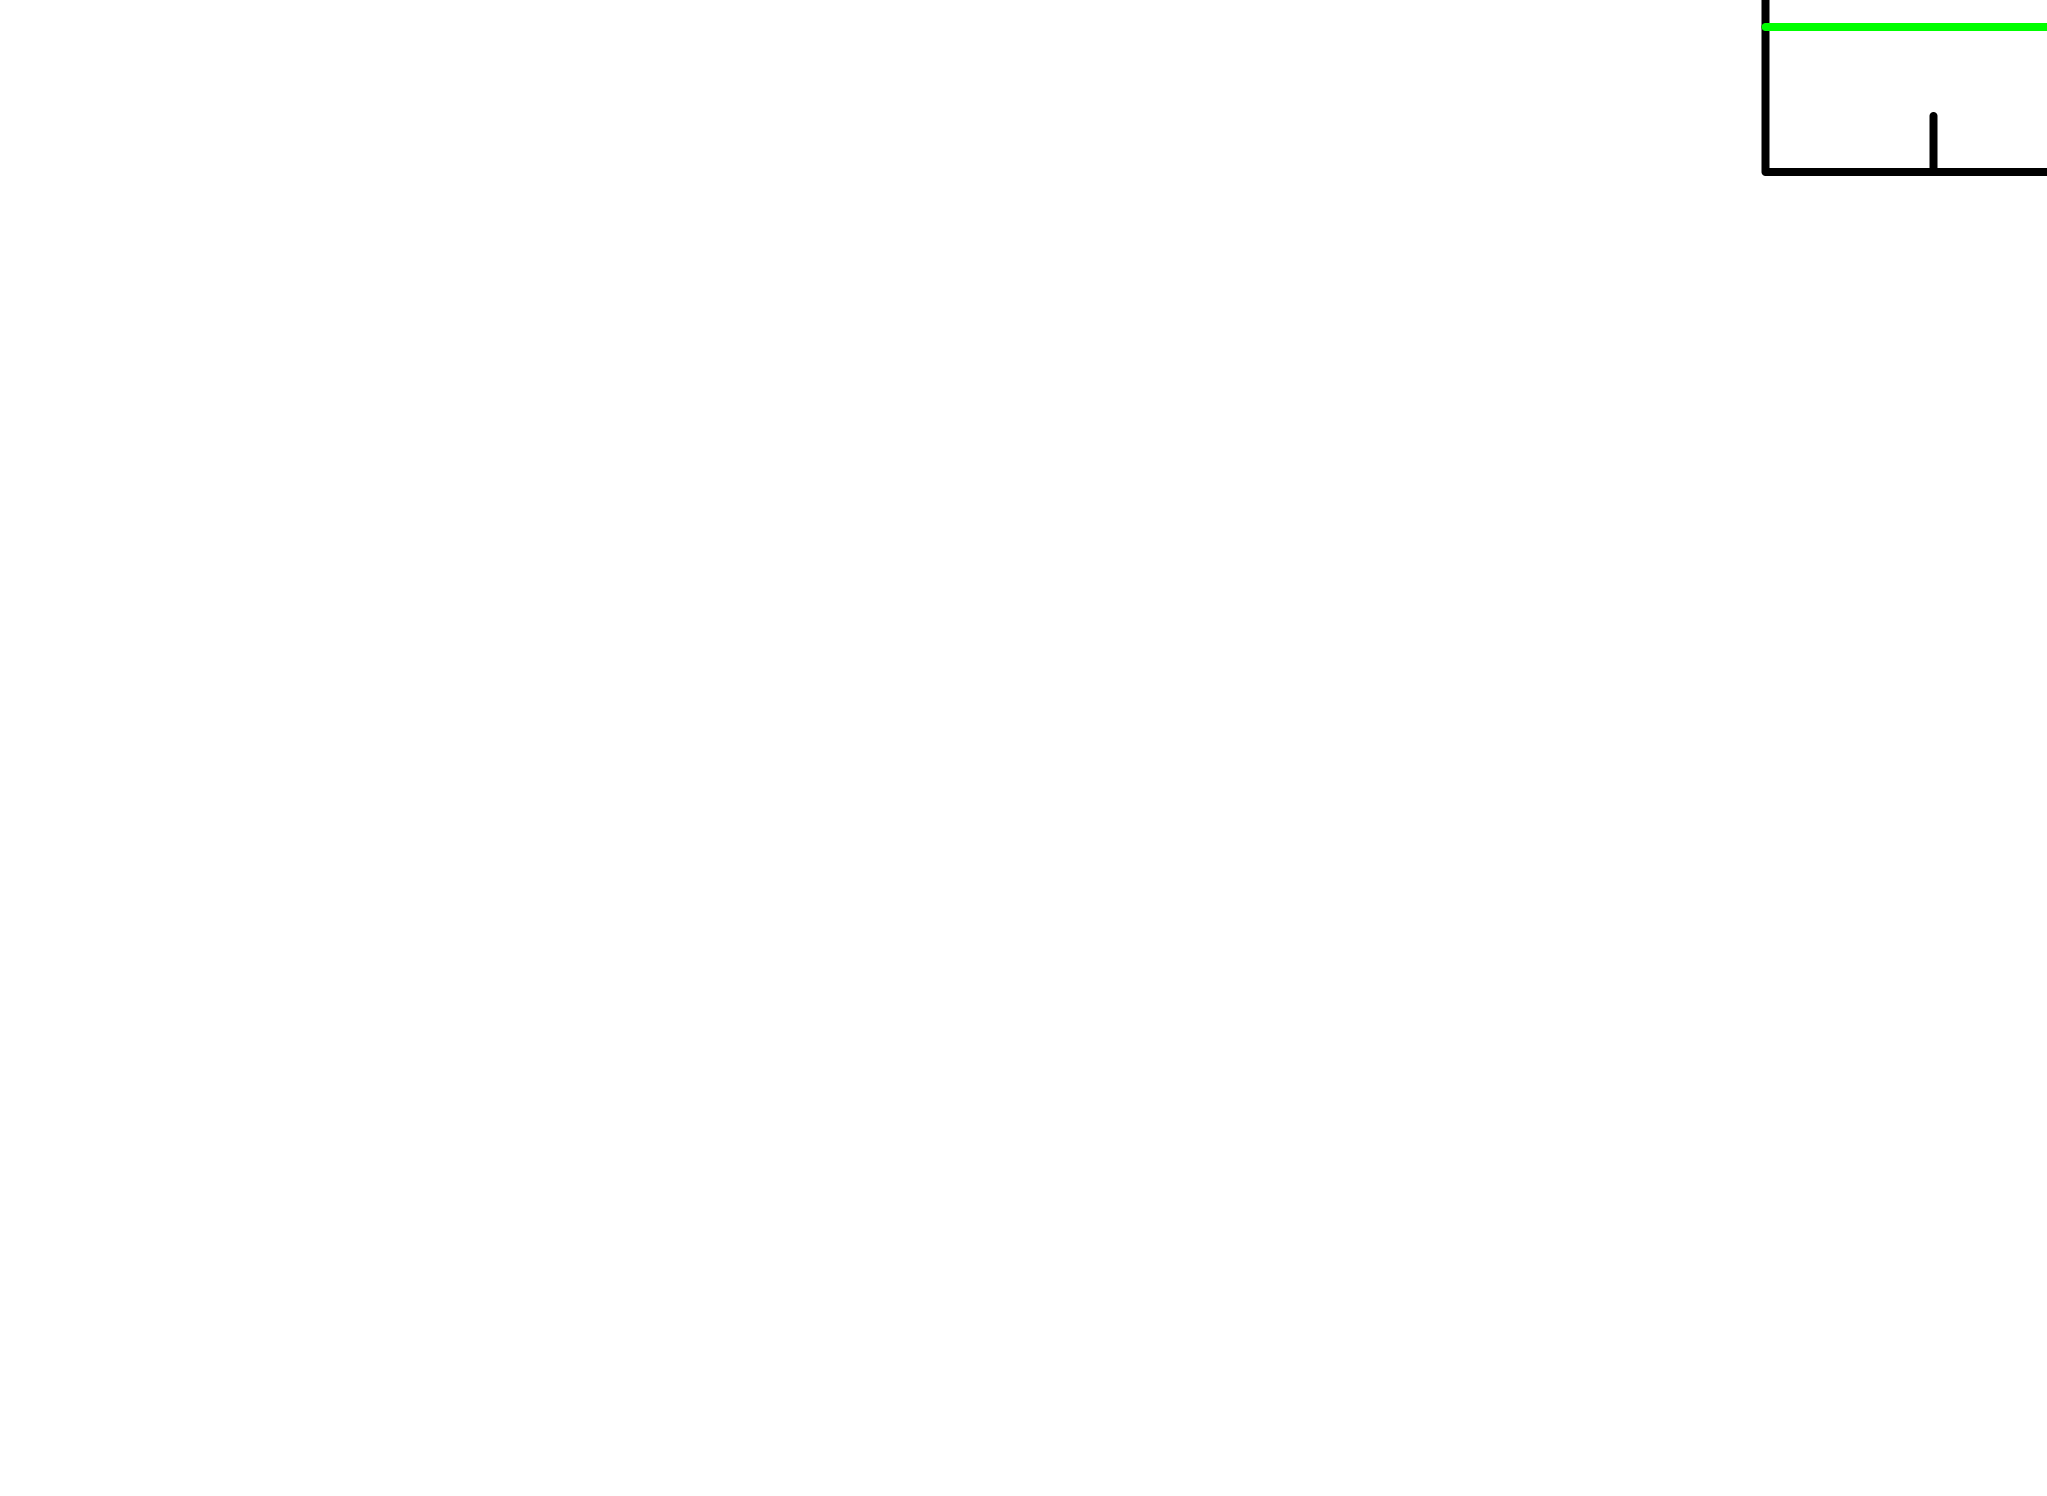

In [3]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

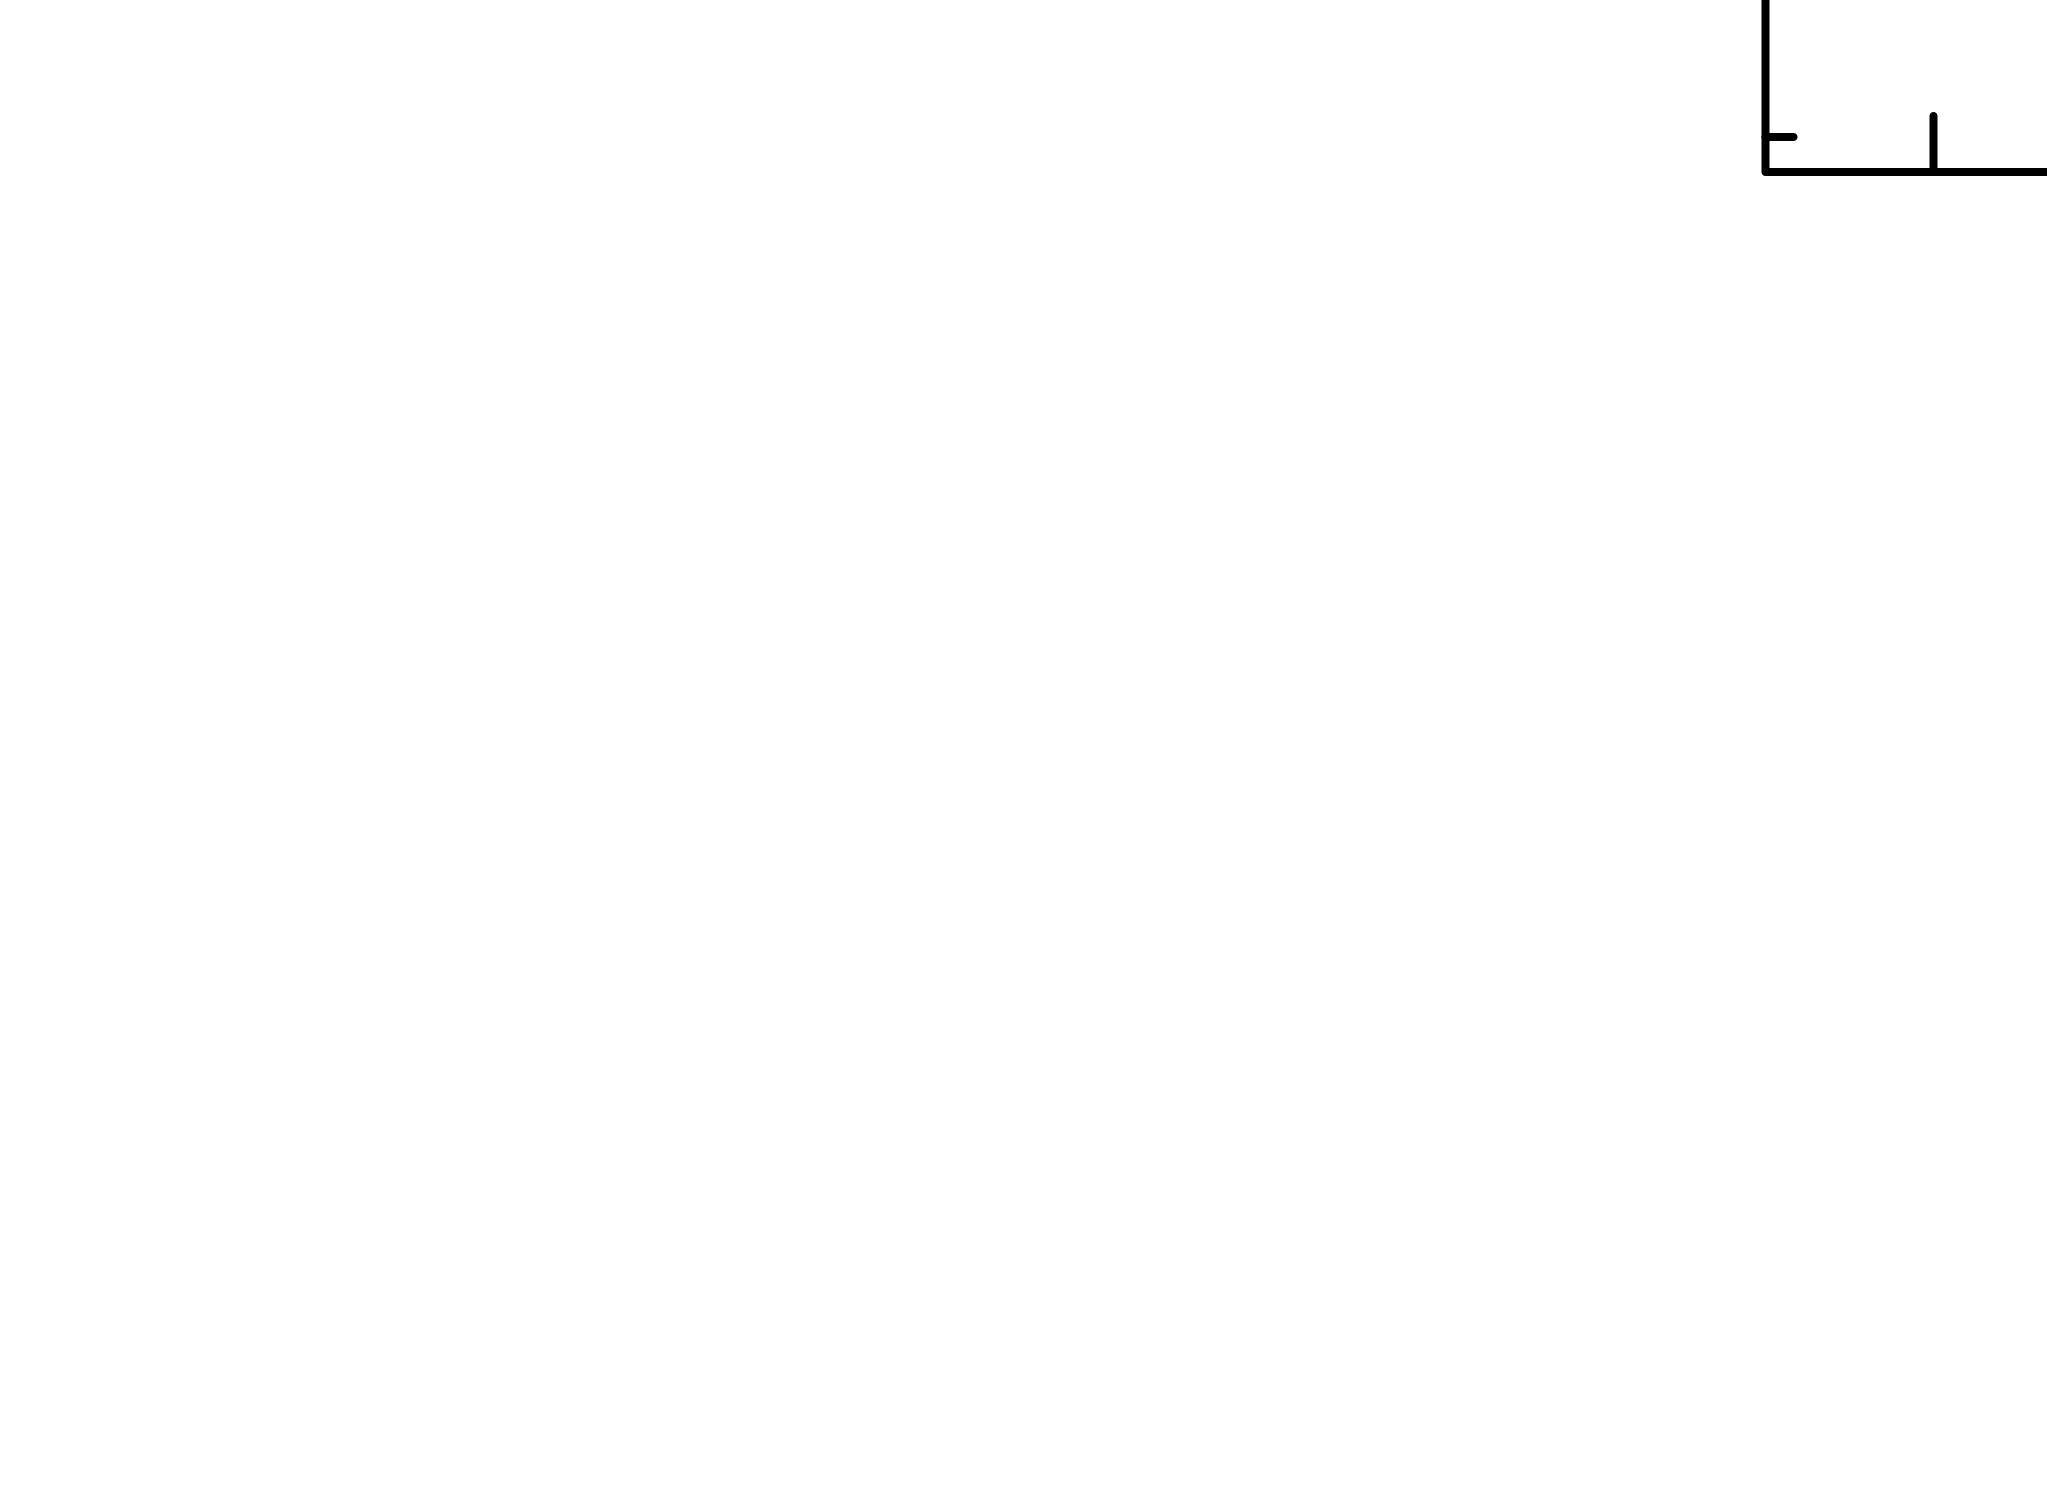


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.403578e+10     using 4 bins.

Test statistic : Chi-Squared              3.403578e+10     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
9.28881      0.184864      0       1.03617       13.1270   2.39266e-05
8.49325      20736.5       0      0.883774       45.2520   2.46796e-05
7.75741      44114.6      -1      0.749470       197.320   3.54646e-05
7.2

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              5.725347e+09     using 4 bins.

Test statistic : Chi-Squared              5.725347e+09     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
18.8819      1.08302       0       1.06842       1.33692   4.3

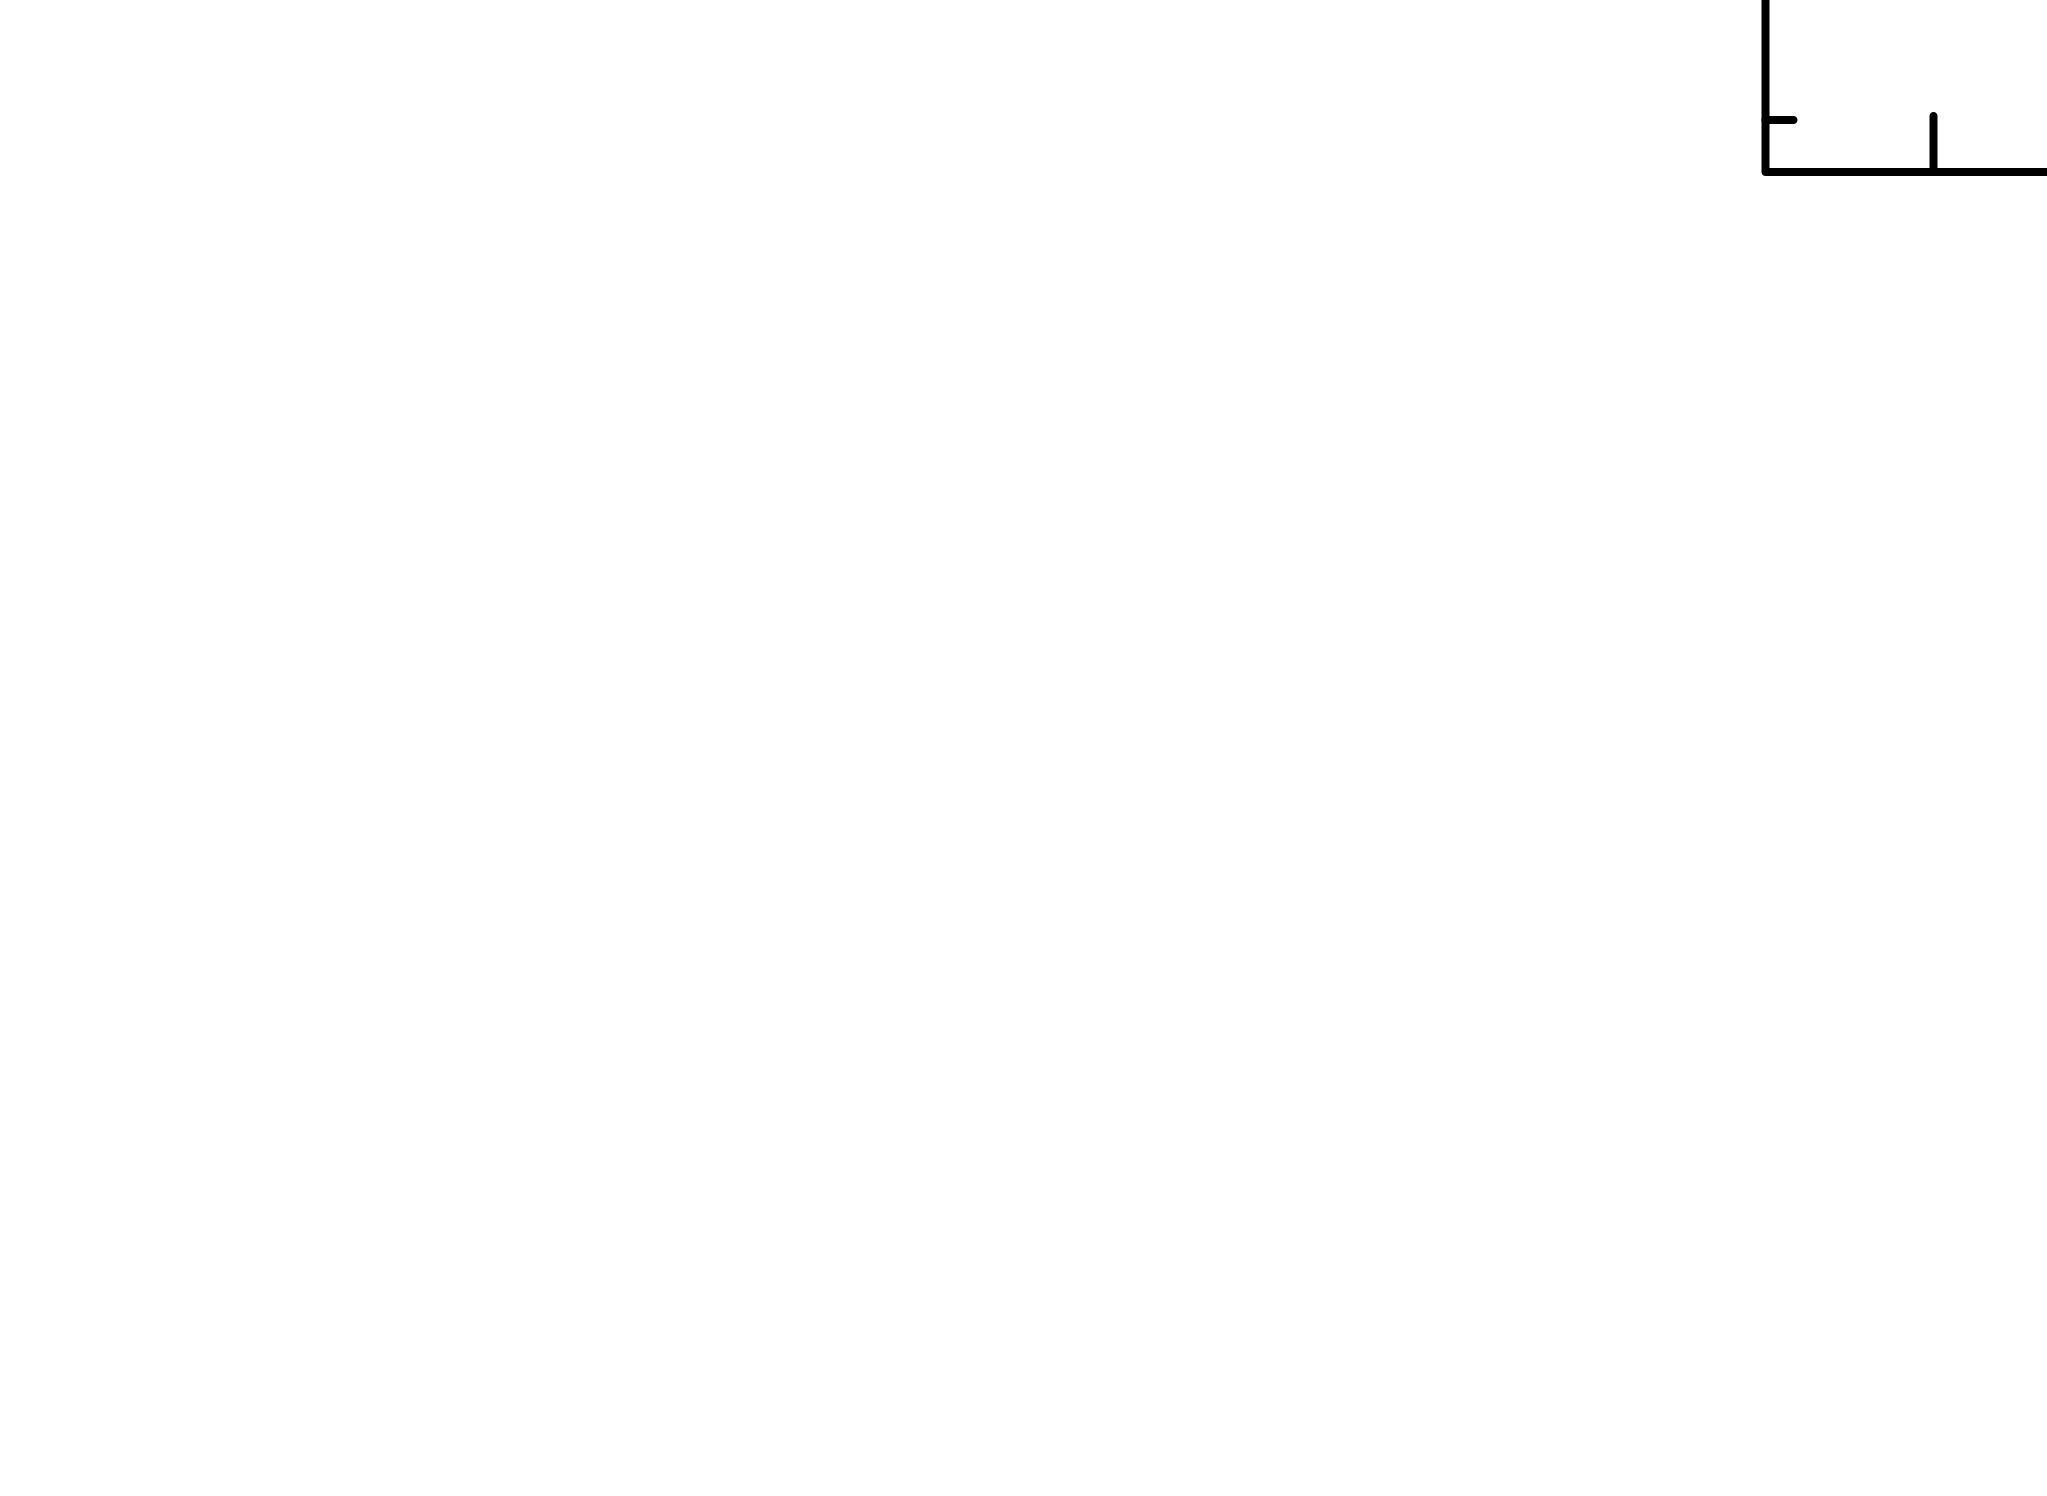

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

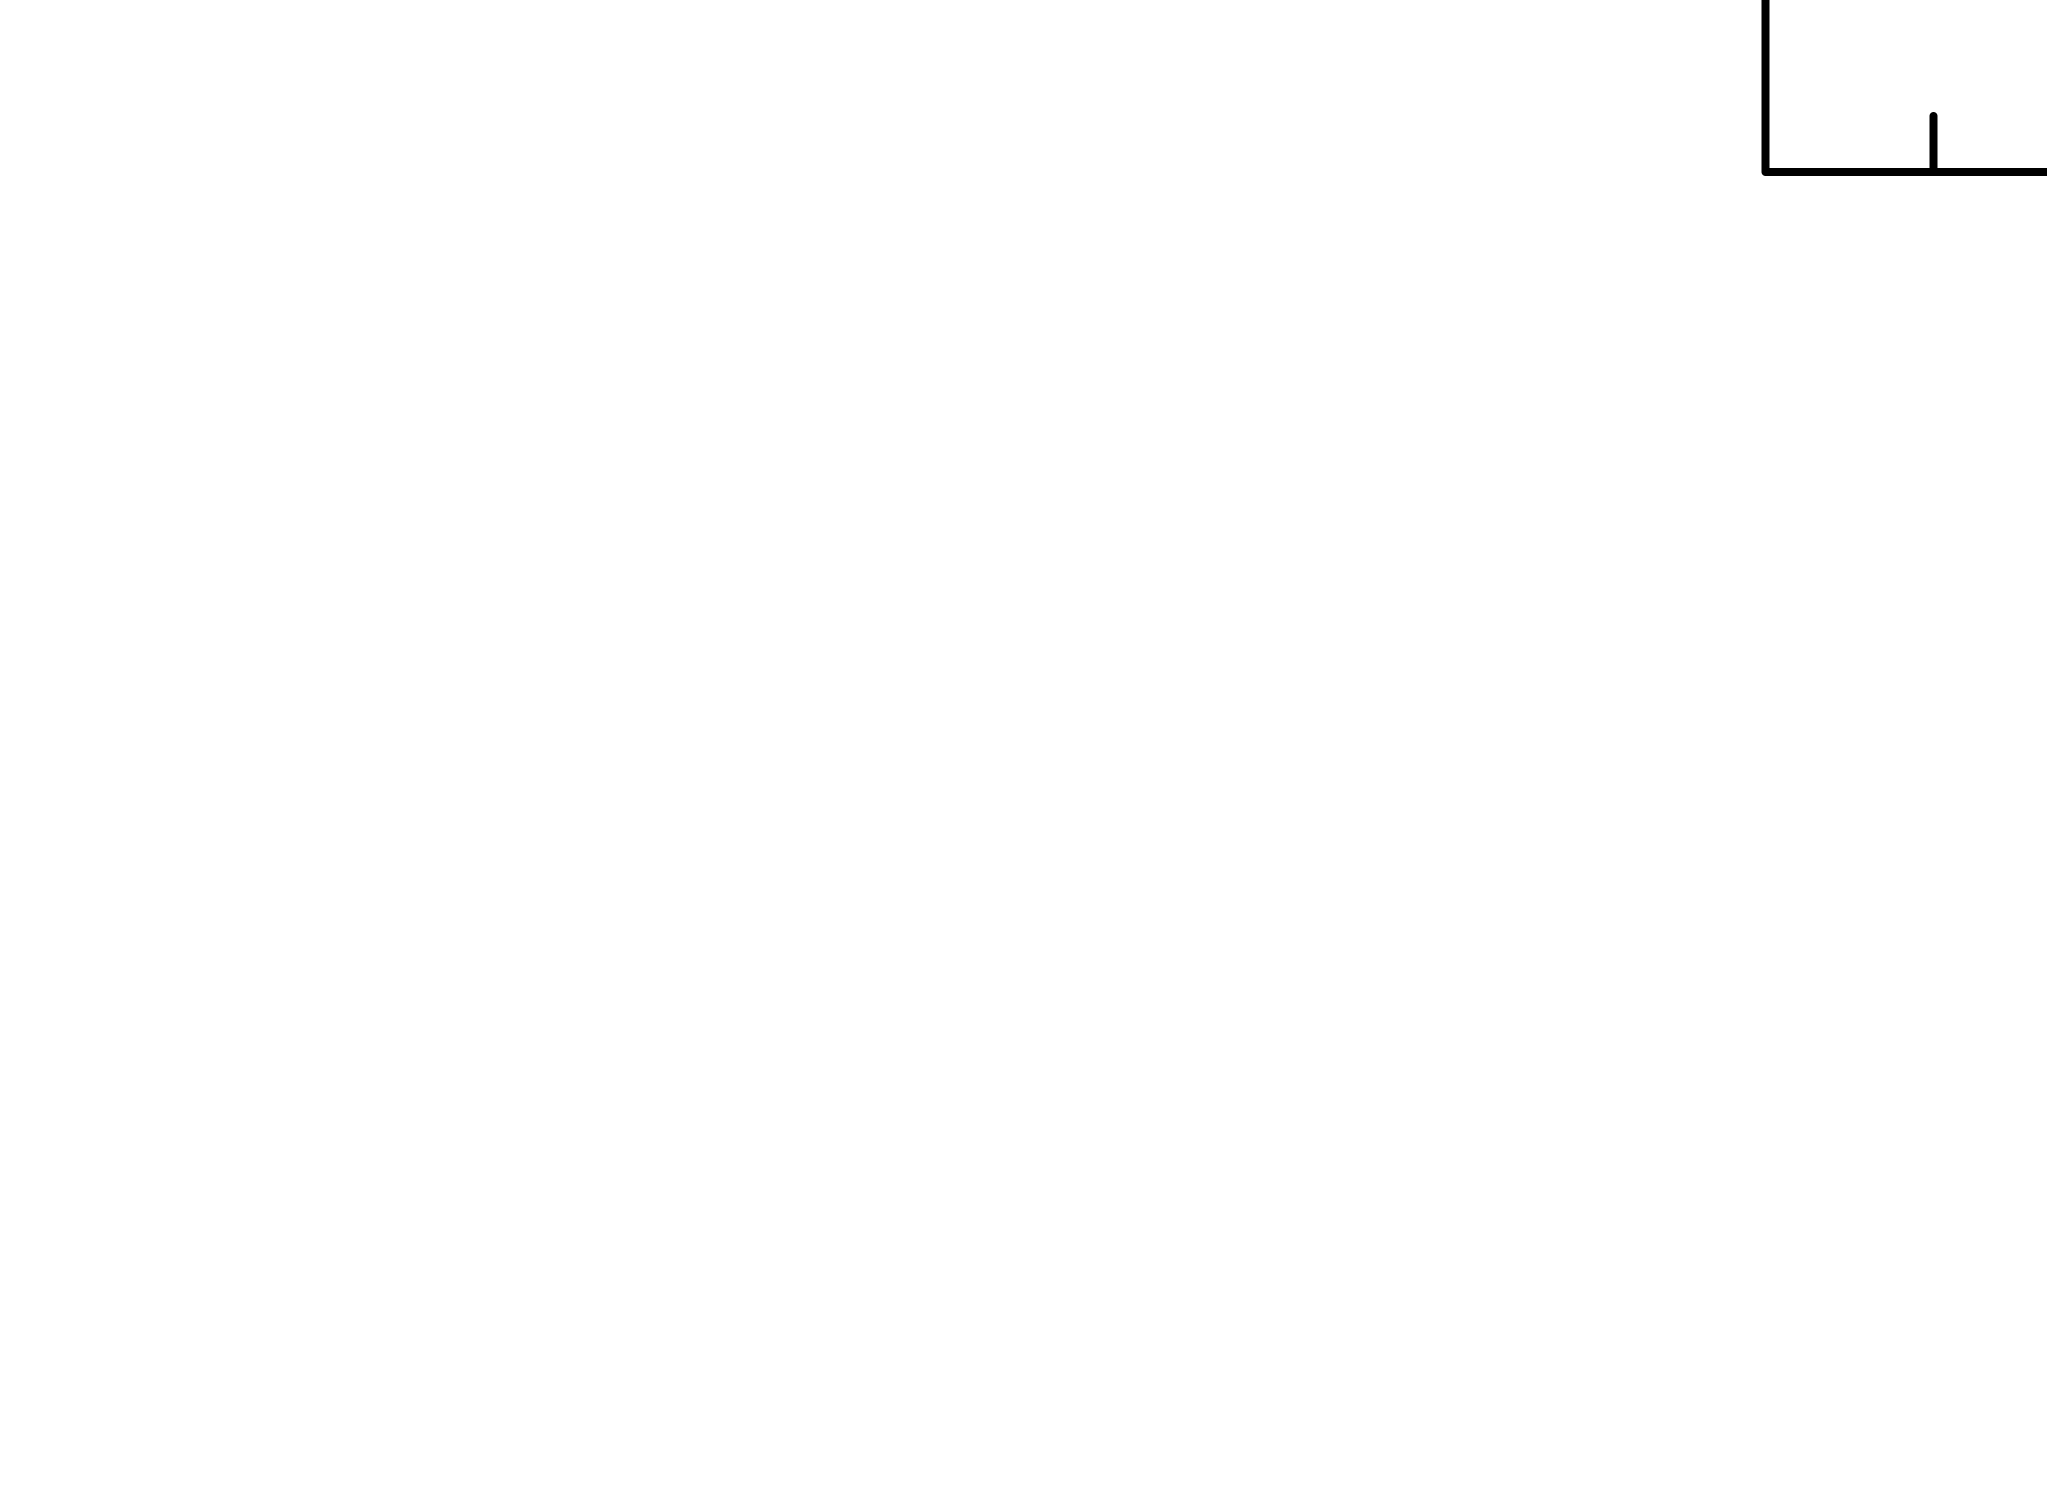


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.807742e+11     using 4 bins.

Test statistic : Chi-Squared              1.807742e+11     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
5.00544      0.741623     -1      0.810337      0.741758   8.50364e-06
2.84098      43538.1      -2     0.0738736     -0.408743   1.68624e-06
2.80431      623121       -1     0.0135285     -0.465332   1.54095e-06
2

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 3.993e-05 photons (4.1105e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
plx = 2.6453
d_kpc = 1/plx
F_x = 4.0753*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

6.966124042868e+30


In [9]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

0.37802895701810757
30.842991203491938


In [10]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.51)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  6.564313274144692e-14
F_x / F_opt:  0.792970285429105
